In [1]:
from tes.data import Data
import numpy as np
import matplotlib.pyplot as plt

In [2]:
trace_dt=np.dtype([('raw','i4'),('filtered','i4'),('slope','i4')])

In [89]:
traces=np.fromfile('data/traces',trace_dt)

In [3]:
traces=Data.fromfile('traces',trace_dt,'teslib','channel_TB',tool='vivado')

<IPython.core.display.Javascript object>


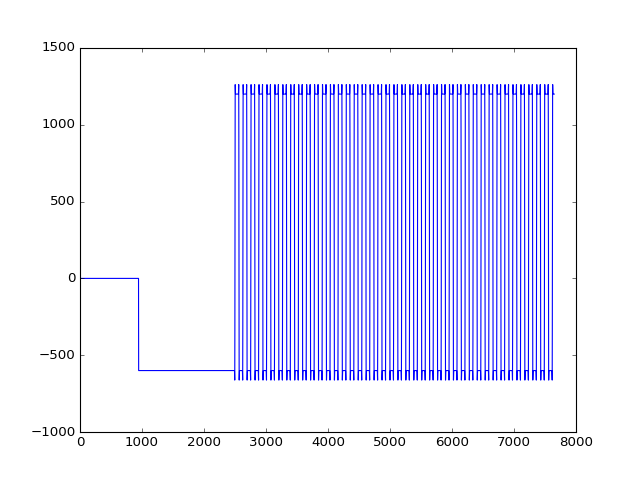

In [9]:
%matplotlib notebook
plt.plot(traces['filtered'][100:])

In [5]:
stream_dt=np.dtype([('data','u8'),('last','i4')])
stream=np.fromfile('data/stream',stream_dt)

In [127]:
stream=Data.fromfile('stream',stream_dt,'teslib','channel_TB',tool='vivado')
stream

array([(2348627205724045312, 2670), (4467576330730406144, 2671),
       (11240145745011278848, -2672), (2348627205724045312, 2798),
       (4467576330730406144, 2799), (11240145745011278848, -2800),
       (2348627205724045312, 2926), (4467576330730406144, 2927),
       (11240145745011278848, -2928), (2348627205724045312, 3054),
       (4467576330730406144, 3055), (11240145745011278848, -3056),
       (2348627205724045312, 3182), (4467576330730406144, 3183),
       (11240145745011278848, -3184), (2348627205724045312, 3310),
       (4467576330730406144, 3311), (11240145745011278848, -3312),
       (2348627205724045312, 3438), (4467576330730406144, 3439),
       (11240145745011278848, -3440), (2348627205724045312, 3566),
       (4467576330730406144, 3567), (11240145745011278848, -3568),
       (2348627205724045312, 3694), (4467576330730406144, 3695),
       (11240145745011278848, -3696), (2348627205724045312, 3822),
       (4467576330730406144, 3823), (11240145745011278848, -3824),
     

In [213]:
'{:08X}'.format(stream['data'][0])

'B4040600'

In [214]:
event_dt=np.dtype([('rise','>i2'),('height','>i2'),('time','>i2'),('flags','>i2')])

In [215]:
events=stream['data'].view(event_dt)

In [216]:
'{:X}'.format(events['flags'][0])

'0'

In [217]:
events['rise']

array([ 6, 56,  6], dtype=int16)

In [218]:
events

array([(6, 1204, 0, 0), (56, 1213, 0, 4096), (6, 1204, 0, 0)], 
      dtype=[('rise', '>i2'), ('height', '>i2'), ('time', '>i2'), ('flags', '>i2')])

In [206]:
'{:04X}'.format(events['flags'][1])

'1000'

In [128]:
pulse_peak_dt=np.dtype([('rise','>i2'),('height','>i2'),('time','>i2'),('minima','>i2')])
pulse_dt=np.dtype([('reserved','>i2'),('size','>i2'),('time','>i2'),('flags','>i2'),
                  ('area','>i4'),('offset','>i2'),('length','>i2'),('peaks',(pulse_peak_dt,2))])
data=np.copy(stream['data'])

In [123]:
pulses=data.view(pulse_dt)

In [129]:
pulses['peaks']['height']-pulses['peaks']['minima']

array([[1875,   13],
       [1875,   13],
       [1875,   13],
       [1875,   13],
       [1875,   13],
       [1875,   13],
       [1875,   13],
       [1875,   13],
       [1875,   13],
       [1875,   13],
       [1875,   13],
       [1875,   13],
       [1875,   13],
       [1875,   13],
       [1875,   13],
       [1875,   13],
       [1875,   13],
       [1875,   13],
       [1875,   13],
       [1875,   13],
       [1875,   13],
       [1875,   13],
       [1875,   13],
       [1875,   13],
       [1875,   13],
       [1875,   13],
       [1875,   13],
       [1875,   13],
       [1875,   13],
       [1875,   13],
       [1875,   13],
       [1875,   13],
       [1875,   13],
       [1875,   13],
       [1875,   13],
       [1875,   13],
       [1875,   13],
       [1875,   13],
       [1875,   13],
       [1875,   13],
       [1875,   13],
       [1875,   13],
       [1875,   13],
       [1875,   13],
       [1875,   13],
       [1875,   13],
       [1875,   13],
       [1875,

In [120]:
pulses['offset']

array([4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4], dtype=int16)

In [66]:
stream['data'][:3].view(pulse_dt)

ValueError: new type not compatible with array.

In [77]:
pulse0_dt=np.dtype([('reserved','>i2'),('size','>i2'),('time','>i2'),('flags','>i2')])
pulse1_dt=np.dtype([('area','>i4'),('offset','>i2'),('length','>i2')])
pulseh_dt=np.dtype([('reserved','>i2'),('size','>i2'),('time','>i2'),('flags','>i2'),
                    ('area','>i4'),('offset','>i2'),('length','>i2')])

In [67]:
stream[0]['data'].view(pulse0_dt)

(0, 3, 0, 2080)

In [78]:
stream[:2]['data'].view(pulseh_dt)

ValueError: new type not compatible with array.

In [76]:
stream[:2]['data']

array([2308094809077710848, 4467579629265289472], dtype=uint64)